## Data Cleaning and Analysis

1. Data Aggregation

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange 
import seaborn as sns

In [44]:
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [45]:
happiness2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [46]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [5]:
regions = happiness2015["Region"].unique()
regions

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [6]:
region_dic = {}
for r in happiness2015["Region"]:
    if r not in region_dic:
        region_dic[r] = 1
    else:
        region_dic[r] += 1

In [7]:
region_dic

{'Western Europe': 21,
 'North America': 2,
 'Australia and New Zealand': 2,
 'Middle East and Northern Africa': 20,
 'Latin America and Caribbean': 22,
 'Southeastern Asia': 9,
 'Central and Eastern Europe': 29,
 'Eastern Asia': 6,
 'Sub-Saharan Africa': 40,
 'Southern Asia': 7}

In [8]:
mean_happiness = {}
for r in regions:
    region_group = happiness2015[happiness2015["Region"] == r]
    uhm = region_group["Happiness Score"].mean()
    mean_happiness[r] = uhm
    
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.144681818181818,
 'Southeastern Asia': 5.317444444444445,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.202800000000001,
 'Southern Asia': 4.580857142857143}

In [9]:
grouped = happiness2015.groupby("Region")
sub_africa = grouped.get_group("Sub-Saharan Africa")
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [10]:
means = grouped.mean()
means

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [11]:
happy_grouped = grouped["Happiness Score"]
happy_mean = happy_grouped.mean()
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [12]:
happy_mean_max = grouped.agg([np.mean, np.max])
happy_mean_max

Happiness Rank      Happiness Score         \
                                          mean amax            mean   amax   
Region                                                                       
Australia and New Zealand             9.500000   10        7.285000  7.286   
Central and Eastern Europe           79.000000  134        5.332931  6.505   
Eastern Asia                         64.500000  100        5.626167  6.298   
Latin America and Caribbean          46.909091  119        6.144682  7.226   
Middle East and Northern Africa      77.600000  156        5.406900  7.278   
North America                        10.000000   15        7.273000  7.427   
Southeastern Asia                    81.222222  145        5.317444  6.798   
Southern Asia                       113.142857  153        4.580857  5.253   
Sub-Saharan Africa                  127.900000  158        4.202800  5.477   
Western Europe                       29.523810  102        6.689619  7.587   

                                Standard Error           \
                                          mean     amax   
Region                                                    
Australia and New Zealand             0.037270  0.04083   
Central and Eastern Europe            0.045208  0.06913   
Eastern Asia                          0.037225  0.05051   
Latin America and Caribbean           0.061127  0.13693   
Middle East and Northern Africa       0.046337  0.07832   
North America                         0.036960  0.03839   
Southeastern Asia                     0.042691  0.06698   
Southern Asia                         0.032161  0.03751   
Sub-Saharan Africa                    0.055299  0.11068   
Western Europe                        0.037625  0.05635   

                                Economy (GDP per Capita)             Family  \
                                                    mean     amax      mean   
Region                                                                        
Australia and New Zealand                       1.291880  1.33358  1.314450   
Central and Eastern Europe                      0.942438  1.18498  1.053042   
Eastern Asia                                    1.151780  1.38604  1.099427   
Latin America and Caribbean                     0.876815  1.21183  1.104720   
Middle East and Northern Africa                 1.066973  1.69042  0.920490   
North America                                   1.360400  1.39451  1.284860   
Southeastern Asia                               0.789054  1.52186  0.940468   
Southern Asia                                   0.560486  0.83524  0.645321   
Sub-Saharan Africa                              0.380473  1.06024  0.809085   
Western Europe                                  1.298596  1.56391  1.247302   

                                         Health (Life Expectancy)           \
                                    amax                     mean     amax   
Region                                                                       
Australia and New Zealand        1.31967                 0.919965  0.93156   
Central and Eastern Europe       1.34043                 0.718774  0.87337   
Eastern Asia                     1.30060                 0.877388  1.01328   
Latin America and Caribbean      1.30477                 0.703870  0.86027   
Middle East and Northern Africa  1.22393                 0.705616  0.91387   
North America                    1.32261                 0.883710  0.90563   
Southeastern Asia                1.26504                 0.677357  1.02525   
Southern Asia                    1.10395                 0.540830  0.70806   
Sub-Saharan Africa               1.18468                 0.282332  0.70950   
Western Europe                   1.40223                 0.909148  0.95562   

                                  Freedom           \
                                     mean     amax   
Region                                               
Australia and New Zealand        0.645310  0

In [13]:
hap_rank = grouped["Happiness Rank"].agg([np.mean, np.max])
hap_rank

,mean,amax
Region,,
Australia and New Zealand,9.500000,10
Central and Eastern Europe,79.000000,134
Eastern Asia,64.500000,100
Latin America and Caribbean,46.909091,119
Middle East and Northern Africa,77.600000,156
North America,10.000000,15
Southeastern Asia,81.222222,145
Southern Asia,113.142857,153
Sub-Saharan Africa,127.900000,158


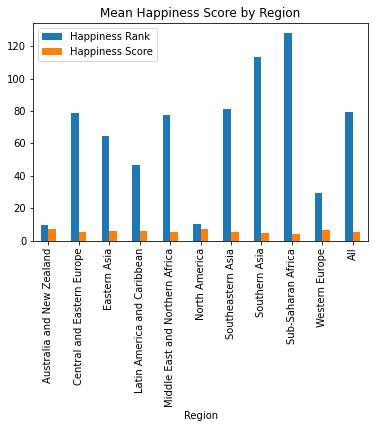

In [14]:
pv_hap = happiness2015.pivot_table(values= ["Happiness Score", "Happiness Rank"], index = "Region", margins = True)
pv_hap.plot(kind="bar", legend=True, title = "Mean Happiness Score by Region", xlim=(0,10))

In [15]:
happy_family_stat = happiness2015.groupby("Region")[["Happiness Score", "Family"]].agg([np.mean, np.max, np.min])
pv_happy_family_stat = happiness2015.pivot_table(values=["Happiness Score", "Family"], index="Region", aggfunc=([np.mean, np.max, np.min]), margins=True)

In [16]:
happy_family_stat

Happiness Score                  Family  \
                                           mean   amax   amin      mean   
Region                                                                    
Australia and New Zealand              7.285000  7.286  7.284  1.314450   
Central and Eastern Europe             5.332931  6.505  4.218  1.053042   
Eastern Asia                           5.626167  6.298  4.874  1.099427   
Latin America and Caribbean            6.144682  7.226  4.518  1.104720   
Middle East and Northern Africa        5.406900  7.278  3.006  0.920490   
North America                          7.273000  7.427  7.119  1.284860   
Southeastern Asia                      5.317444  6.798  3.819  0.940468   
Southern Asia                          4.580857  5.253  3.575  0.645321   
Sub-Saharan Africa                     4.202800  5.477  2.839  0.809085   
Western Europe                         6.689619  7.587  4.857  1.247302   

                                                   
                                    amax     amin  
Region                                             
Australia and New Zealand        1.31967  1.30923  
Central and Eastern Europe       1.34043  0.38562  
Eastern Asia                     1.30060  0.94675  
Latin America and Caribbean      1.30477  0.74302  
Middle East and Northern Africa  1.22393  0.47489  
North America                    1.32261  1.24711  
Southeastern Asia                1.26504  0.62736  
Southern Asia                    1.10395  0.30285  
Sub-Saharan Africa               1.18468  0.00000  
Western Europe                   1.40223  0.89318

In [17]:
pv_happy_family_stat

mean                     amax  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.31967   
Central and Eastern Europe       1.053042        5.332931  1.34043   
Eastern Asia                     1.099427        5.626167  1.30060   
Latin America and Caribbean      1.104720        6.144682  1.30477   
Middle East and Northern Africa  0.920490        5.406900  1.22393   
North America                    1.284860        7.273000  1.32261   
Southeastern Asia                0.940468        5.317444  1.26504   
Southern Asia                    0.645321        4.580857  1.10395   
Sub-Saharan Africa               0.809085        4.202800  1.18468   
Western Europe                   1.247302        6.689619  1.40223   
All                              0.991046        5.375734  1.40223   

                                                    amin                  
                                Happiness Score   Family Happiness Score  
Region                                                                    
Australia and New Zealand                 7.286  1.30923           7.284  
Central and Eastern Europe                6.505  0.38562           4.218  
Eastern Asia                              6.298  0.94675           4.874  
Latin America and Caribbean               7.226  0.74302           4.518  
Middle East and Northern Africa           7.278  0.47489           3.006  
North America                             7.427  1.24711           7.119  
Southeastern Asia                         6.798  0.62736           3.819  
Southern Asia                             5.253  0.30285           3.575  
Sub-Saharan Africa                        5.477  0.00000           2.839  
Western Europe                            7.587  0.89318           4.857  
All                                       7.587  0.00000           2.839

## Combining Data with Panda

In [18]:
happiness2016 = pd.read_csv("World_Happiness_2016.csv")

In [19]:
happiness2016["Year"] = "2016"
happiness2015["Year"] = "2015"

In [20]:
head_2016 = happiness2016.head(3)

In [21]:
head_2015 = happiness2015.head(3)

In [22]:
head_test = pd.concat([head_2015[['Country','Happiness Score', 'Year']], head_2016[['Country','Happiness Score', 'Year']]], axis=1)
head_test

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


Concat function joins dataset and can join more than one dataset, it can join dataset either vertically(stacked) - axis = 0 or horizontally - axis = 1 for comparison purposes, the default axis = 0, which means to stack dataset on top eachother. It retains the indexes of all datasets combined together but this can be altered by setting the argument `ignore_index = True`

In [23]:
head_test2 = pd.concat([head_2015[['Country','Happiness Score', 'Year']], head_2016[['Country','Happiness Score', 'Year']]])
head_test2

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [24]:
head_test3 = pd.concat([head_2015[['Country','Happiness Score', 'Year', "Standard Error"]], head_2016[['Country','Happiness Score', 'Year']]])
head_test3

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
0,Denmark,7.526,NaN,2016
1,Switzerland,7.509,NaN,2016
2,Iceland,7.501,NaN,2016


Notice that when concating datasets with different shapes, the fucntion automatically fills missing values with NaN values as demonstrated above.

In [25]:
concat_update_index = pd.concat([head_2015[['Country','Happiness Score', 'Year']], head_2016[['Country','Happiness Score', 'Year']]], ignore_index = True)
#Ignore index to keep just one index as the concat fucntion keeps all data as they were, it only stacks or arrange data side-by-side 
concat_update_index

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Denmark,7.526,2016
4,Switzerland,7.509,2016
5,Iceland,7.501,2016


In [26]:
happiness2017 = pd.read_csv("World_Happiness_2017.csv")
happiness2017["Year"] = "2017"

In [27]:
happiness2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

In [28]:
happiness2017.rename(columns={"Happiness.Rank":"Happiness Rank", "Happiness.Score":"Happiness Score", "Dystopia.Residual":"Dystopia Residual"}, inplace= True)

In [29]:
happiness2017.rename(columns={"Economy..GDP.per.Capita.":"Economy (GDP per Capita)", "Health..Life.Expectancy.":"Health (Life Expectancy)", "Trust..Government.Corruption.":"Trust (Government Corruption)"}, inplace=True)

In [30]:
happiness2017.head(5)

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [31]:
merged = pd.merge(left = happiness2015[["Country", "Happiness Score", "Year", "Happiness Rank"]].head(5), right = happiness2016[["Country", "Happiness Score", "Year", "Happiness Rank"]].head(5), on = "Country")
merged

,Country,Happiness Score_x,Year_x,Happiness Rank_x,Happiness Score_y,Year_y,Happiness Rank_y
0,Switzerland,7.587,2015,1,7.509,2016,2
1,Iceland,7.561,2015,2,7.501,2016,3
2,Denmark,7.527,2015,3,7.526,2016,1
3,Norway,7.522,2015,4,7.498,2016,4


In [32]:
happiness2015[["Country", "Happiness Score", "Year", "Happiness Rank"]].head(5)

,Country,Happiness Score,Year,Happiness Rank
0,Switzerland,7.587,2015,1
1,Iceland,7.561,2015,2
2,Denmark,7.527,2015,3
3,Norway,7.522,2015,4
4,Canada,7.427,2015,5


In [33]:
happiness2016[["Country", "Happiness Score", "Year", "Happiness Rank"]].head(5)

,Country,Happiness Score,Year,Happiness Rank
0,Denmark,7.526,2016,1
1,Switzerland,7.509,2016,2
2,Iceland,7.501,2016,3
3,Norway,7.498,2016,4
4,Finland,7.413,2016,5


Since we joined the dataframes on the Country column, or used it as the key, the merge() function looked to match elements in the Country column in BOTH dataframes.
Two Countries were not returned which are Canada and Finland because they do not appear in both left and right dataset, the elements returned are those that appeared in BOTH datasets.

Merge function only combines dataframes horizontally (axis=1) and can only combine two dataframes at a time. With the merge() function, we'll combine dataframes on a key, a shared index or column. When choosing a key, it's good practice to use keys with unique values to avoid duplicating data.

You can think of keys as creating a link from one dataframe to another using the common values or indexes.

This way of combining, or joining, data is called an inner join. An inner join returns only the intersection of the keys, or the elements that appear in both dataframes with a common key.

There are actually four different types of joins:

- Inner: only includes elements that appear in both dataframes with a common key
- Outer: includes all data from both dataframes
- Left: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
- Right: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes

If the definition for outer joins sounds familiar, it's because we've already seen examples of outer joins! Recall that when we combined data using the concat function, it kept all of the data from all dataframes, no matter if missing values were created.

In [34]:
merged_left = pd.merge(left = happiness2015[["Country", "Happiness Score", "Year", "Happiness Rank"]].head(5), right = happiness2016[["Country", "Happiness Score", "Year", "Happiness Rank"]].head(5), how = "left", on = "Country")
merged_left

,Country,Happiness Score_x,Year_x,Happiness Rank_x,Happiness Score_y,Year_y,Happiness Rank_y
0,Switzerland,7.587,2015,1,7.509,2016,2.0
1,Iceland,7.561,2015,2,7.501,2016,3.0
2,Denmark,7.527,2015,3,7.526,2016,1.0
3,Norway,7.522,2015,4,7.498,2016,4.0
4,Canada,7.427,2015,5,NaN,NaN,NaN


In [35]:
merge_index = pd.merge(left=happiness2015[["Country", "Happiness Rank", "Happiness Score", "Year"]].head(5), right=happiness2016[["Country", "Happiness Rank", "Happiness Score", "Year"]].head(3), left_index=True, right_index=True, suffixes=('_2015','_2016'), how = "left")
merge_index

,Country_2015,Happiness Rank_2015,Happiness Score_2015,Year_2015,Country_2016,Happiness Rank_2016,Happiness Score_2016,Year_2016
0,Switzerland,1,7.587,2015,Denmark,1.0,7.526,2016
1,Iceland,2,7.561,2015,Switzerland,2.0,7.509,2016
2,Denmark,3,7.527,2015,Iceland,3.0,7.501,2016
3,Norway,4,7.522,2015,NaN,NaN,NaN,NaN
4,Canada,5,7.427,2015,NaN,NaN,NaN,NaN


Another way to join dataframes - on the index. We'll join `happiness2015` and `happiness2016` on index using an inner join, so that the result contains only the elements in the key that appear in BOTH dataframes. To join on the index, we'll set the `left_index` and `right_index` parameters to `True`. 
When we join on index, however, our result will contain only common indexes.

In [36]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index= True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
Country                          470 non-null object
Dystopia Residual                470 non-null float64
Economy (GDP per Capita)         470 non-null float64
Family                           470 non-null float64
Freedom                          470 non-null float64
Generosity                       470 non-null float64
Happiness Rank                   470 non-null int64
Happiness Score                  470 non-null float64
Health (Life Expectancy)         470 non-null float64
Lower Confidence Interval        157 non-null float64
Region                           315 non-null object
Standard Error                   158 non-null float64
Trust (Government Corruption)    470 non-null float64
Upper Confidence Interval        157 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Year                             47

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


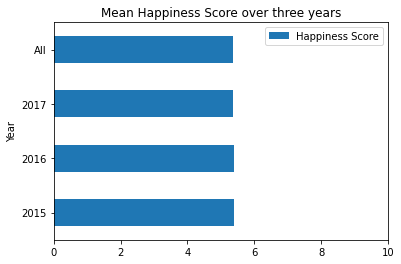

In [37]:
combined.pivot_table("Happiness Score", "Year", aggfunc=(np.mean), margins=True).plot(kind="barh", xlim=(0,10), title="Mean Happiness Score over three years")

## Transforming Data With Panda

Pandas has a couple methods that can be used to apply a custom function like the one above to our data, starting with the following two methods:

- Series.map() method
- Series.apply() method

Both methods above apply a function element-wise to a column. When we say element-wise, we mean that we pass the function one value in the series at a time and it performs some kind of transformation.

In [38]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [39]:
def label(x):
    if x > 1:
        return "high"
    else:
        return "low"
    
economy_impact_apply = happiness2015["Economy (GDP per Capita)"].apply(label)
economy_impact_map = happiness2015["Economy (GDP per Capita)"].map(label)
economy_impact_apply.equals(economy_impact_map)

True

In [40]:
def label(x, y):
    if x > y:
        return "high"
    else:
        return "low"
    
economy_impact_apply = happiness2015["Economy (GDP per Capita)"].apply(label, y=0.8)

In [41]:
economy_impact_map = happiness2015["Economy (GDP per Capita)"].map(label, y=0.8)

TypeError: map() got an unexpected keyword argument 'y'

This is the basic difference between `map()` and `apply()` function, the ability to take a modifiable fucntion

We can apply a function element-wise to multiple columns using the df.applymap() method.

> def label(element):
    
>     if element > 1:

>        return 'High'

>     else:

>        return 'Low'

factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity'] 

factors_impact = happiness2015[factors].applymap(label)

In [ ]:
def label(x):
    if x > 1:
        return "high"
    else:
        return "low"
    
factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity'] 
factors_impact = happiness2015[factors].applymap(label)

In [ ]:
factors_impact

In [ ]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    result = num/den
    return result

v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct

In [ ]:
factors = happiness2015[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', "Dystopia Residual"]]

def percen(col):
    div = col/happiness2015["Happiness Score"]
    result = div*100
    return result

factors_percentages = factors.apply(percentages)
factors_percentages

In [ ]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = melt['value']/melt['Happiness Score'] * 100
melt

The melt function moved the values in the seven columns - Economy, Health, Family, Freedom, Generosity, Trust, and Dystopia Residual - to the same column, which meant we could transform them all at once.

You may have also noticed that now the data is in a format that makes it easier to aggregate. We refer to data in this format as tidy data.

In [ ]:
pv_melt = melt.pivot_table(index="variable", values="value")
pv_melt.plot(kind="pie", y="value", legend=False)

## Working with Strings in Panda

In [ ]:
world_dev = pd.read_csv("World_dev.csv")

In [ ]:
world_dev.info()

In [ ]:
merged = pd.merge(left=happiness2015, right=world_dev, how="left", left_on="Country", right_on ="ShortName")

In [ ]:
merged.rename(columns={"SourceOfMostRecentIncomeAndExpenditureData":"IESurvey"}, inplace=True)

In [ ]:
merged.columns

In [ ]:
merger = merged[["ShortName", "CurrencyUnit", "IncomeGroup", "IESurvey", "Region_x", "SpecialNotes"]]
merger

In [ ]:
def extract_last_word(element):
    return str(element).split()[-1]

currency_apply = merged['CurrencyUnit'].apply(extract_last_word)
currency_apply

We extracted the last word of each element in the CurrencyUnit column using the Series.apply() method

In [ ]:
merger

In the last exercise, we extracted the last word of each element in the CurrencyUnit column using the Series.apply() method. However, we also learned in the last mission that we should use built-in vectorized methods (if they exist) instead of the Series.apply() method for performance reasons.

Instead, we could've split each element in the CurrencyUnit column into a list of strings with the Series.str.split() method, the vectorized equivalent of Python's string.split() method

In fact, pandas has built in a number of vectorized methods that perform the same operations for strings in series as Python string methods.

Below are some common vectorized string methods, but you can find the full list here:

Method	Description
- Series.str.split() -	Splits each element in the Series.
- Series.str.strip() -	Strips whitespace from each string in the Series.
- Series.str.lower() -	Converts strings in the Series to lowercase.
- Series.str.upper() -	Converts strings in the Series to uppercase.
- Series.str.get() -	Retrieves the ith element of each element in the Series.
- Series.str.replace() -	Replaces a regex or string in the Series with another string.
- Series.str.cat() -	Concatenates strings in a Series.
- Series.str.extract()- 	Extracts substrings from the Series matching a regex pattern.


> The str attribute indicates that each object in the Series should be treated as a string, without us having to explicitly change the type to a string like we did when using the apply method. Note that we can also slice each element in the Series to extract characters, but we'd still need to use the str attribute.

> It's also good to know that vectorized string methods can be chained. For example, suppose we needed to split each element in the CurrencyUnit column into a list of strings using the Series.str.split() method and capitalize the letters using the Series.str.upper() method. You can use the following syntax to apply more than one method at once:

`merged['CurrencyUnit'].str.upper().str.split()`

However, don't forget to include str before each method name, or you'll get an error!

In [ ]:
currency_vectorized = merger["CurrencyUnit"].str.split().str.get(-1)
currency_vectorized

In [ ]:
lengths = merger['CurrencyUnit'].str.len()
value_counts = lengths.value_counts(dropna=False)
value_counts

In [ ]:
national_accounts = merger["SpecialNotes"].str.contains(r"[Nn]ational accounts")
national_accounts

In [ ]:
national_accounts = merger["SpecialNotes"].str.contains(r"[Nn]ational accounts", na=False)
national_accounts

In [ ]:
merger_national_accounts = merger[national_accounts]
merger_national_accounts.head()

In [ ]:
pattern =r"()" #r"(), pattern in the () is called the capture group in which the method will be focused on
pattern = r"([1-2][0-9]{3})" #focusing on capturing years between 1000 and 2999 with this capture groupb
years = merger['SpecialNotes'].str.extract(pattern, expand=False) #expand to false to make the result a series instead of df, expand is always true by default
years.value_counts(dropna=False)

In [ ]:
pattern = r"(?P<Years>[1-2][0-9]{3})" #?P<Years> is use to name the returning column from this method
years = merger['IESurvey'].str.extractall(pattern)
years['Years'].value_counts()

In [ ]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merger['IESurvey'].str.extractall(pattern)
first_two_year = years['First_Year'].str[0:2]
years['Second_Year'] = first_two_year + years['Second_Year']

In [ ]:
years

In [ ]:
merged["IncomeGroup"] = merged["IncomeGroup"].str.strip().str.upper().str.replace("income", "").str.replace(":", "").str.replace("income:", "")
merged["IncomeGroup"].value_counts(dropna=False)

In [ ]:
pv_income = merged.pivot_table(values="Happiness Score", index="IncomeGroup")
pv_income.plot(kind="bar", ylim=(0,10), rot = 30, title= "Pivot Table of Income Groups")
plt.show()

# Working with Missing and Duplicate Data

In [ ]:
happiness2015 = pd.read_csv("wh_2015.csv")
happiness2016 = pd.read_csv("wh_2016.csv")
happiness2017 = pd.read_csv("wh_2017.csv")

In [ ]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape
print(shape_2015, shape_2016, shape_2017)

In [ ]:
happiness2015.info()

In [ ]:
happiness2016.info()

In [ ]:
happiness2017.info()

In [ ]:
happiness2015.isnull().sum()

In [ ]:
happiness2016.isnull().sum()

In [ ]:
happiness2017.isnull().sum()

In [ ]:
happiness2017.columns

In [ ]:
happiness2016.columns

In [ ]:
happiness2015.columns

In [ ]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
missing = combined.isnull().sum()

In [ ]:
combined["COUNTRY"] = combined["COUNTRY"].str.upper()
combined.head()

In [ ]:
missing

In [ ]:
combined.columns

In [ ]:
combined.shape

In [ ]:
combined_updated = combined.set_index("YEAR")

In [ ]:
regions_2017 = combined[combined["YEAR"]==2017]["REGION"]

In [ ]:
missing_2017 = regions_2017.isnull().sum()
missing_2017

In [ ]:
regions = combined[["COUNTRY", "REGION"]]
regions

In [ ]:
reg = {}
for country in regions["COUNTRY"]:
    r = regions[regions["COUNTRY"]==country]["REGION"]
    if country not in reg:
        reg[country]=r
    else:
        pass
        
reg

In [ ]:
combined_test = combined[["COUNTRY", "REGION", "YEAR"]]
combined_test.head(5)

In [ ]:
combined_test["REGION"].value_counts(dropna=False)

In [ ]:
regi = {}
for key in reg:
    regi[key] = reg[key].iloc[0]
    
regi

In [ ]:
combined.duplicated(["COUNTRY", "YEAR"]).value_counts(dropna=False)

In [ ]:
combined["COUNTRY"] = combined["COUNTRY"].str.upper()
dups = combined[combined.duplicated(["COUNTRY", "YEAR"])]
dups

In [ ]:
combined = combined.drop_duplicates(["COUNTRY", "YEAR"], keep = "first")

In [ ]:
combined[combined.duplicated(["COUNTRY", "YEAR"])]

In [ ]:
combined.isnull().sum()

In [ ]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']
combined = combined.drop(columns_to_drop, axis = 1)
missing = combined.isnull().sum()
missing

In [ ]:
combined.dropna(thresh=159, axis=1)

In [ ]:
combined.notnull().sum()

In [ ]:
combined.isnull().sum()

In [ ]:
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)

In [ ]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
print(happiness_mean)
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)
print(combined['HAPPINESS SCORE UPDATED'].mean())

## Guided Project on Dete and Tafe Dataset

In [ ]:
dete = pd.read_csv("dete_exit.csv", encoding= "Latin-1", na_values="Not Stated")
tafe = pd.read_csv("tafe_exit.csv", encoding= "Latin-1")

In [ ]:
dete

In [ ]:
tafe

Dropping irrelevant columns from both datasets

In [ ]:
dete = dete.drop(dete.columns[28:49],axis=1)
tafe = tafe.drop(tafe.columns[17:66],axis=1)

In [ ]:
dete

In [ ]:
tafe

In [ ]:
tafe.isnull().sum()

In [ ]:
dete.isnull().sum()

In [ ]:
dete.columns = dete.columns.str.lower().str.strip().str.replace(" ", "_").str.replace("/", "_")

In [ ]:
tafe.rename(columns={"Record ID":"id","CESSATION YEAR":"cease_date","Reason for ceasing employment":"separationtype","Gender. \xa0\xa0\xa0\xa0What is your Gender?":"gender","CurrentAge. \xa0\xa0\xa0\xa0Current Age":"age","Employment Type. \xa0\xa0\xa0\xa0Employment Type":"employment_status","Classification. \xa0\xa0\xa0\xa0Classification":"position","LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service","LengthofServiceCurrent. Length of Service at current workplace (in years)":"role_service"}, inplace = True)

Renamed these columns so they could be matched to that of dete dataset

In [ ]:
tafe.columns

In [ ]:
dete.columns

In [ ]:
dete["separationtype"].value_counts(dropna=False)

In [ ]:
tafe["separationtype"].value_counts(dropna=False)

In [ ]:
dete_resign = dete["separationtype"].str.contains(r"(Resignation)")
dete_res = dete[dete_resign]
dete_res

In [ ]:
dete_resign.value_counts(dropna=False)

In [ ]:
tafe_resign = tafe["separationtype"].str.contains(r"(Resignation)")
tafe_resign.value_counts(dropna=False)

In [ ]:
tafe_res = tafe[tafe["separationtype"] == "Resignation"]
tafe_res

In [ ]:
dete_res["cease_date"].value_counts(dropna=False).sort_index(ascending=True)

In [ ]:
dete_res["dete_start_date"].value_counts(dropna=False).sort_index(ascending=True)

In [ ]:
cease_date = dete_res["cease_date"].str.extract(r"([2][0-9]{3})")
cease_date.astype(float)
cease_date

In [ ]:
tafe_res["cease_date"].value_counts(dropna=False).sort_index(ascending=True)

In [ ]:
tafe_res.info()

In [ ]:
dete_res["institute_service"] = dete_res["cease_date"].str.extract(r"([2][0-9]{3})", expand=False).astype(float) - dete_res["dete_start_date"]

In [ ]:
dete_res.isnull().sum()

In [ ]:
dete_res = dete_res.drop(["nesb", "disability", "south_sea", "aboriginal", "torres_strait", "business_unit", "classification"], axis=1)

In [ ]:
dete_res.isnull().sum()

In [ ]:
tafe_res.info()

In [ ]:
tafe_res.columns = tafe_res.columns.str.lower().str.strip().str.replace(".","_").str.replace(" ","").str.replace("-","_")

In [ ]:
tafe_res["contributingfactors_dissatisfaction"].value_counts(dropna=False)

In [ ]:
tafe_res["contributingfactors_jobdissatisfaction"].value_counts(dropna=False)

In [ ]:
def update(x):
    if pd.isnull(x):
        return np.nan
    elif x == "-":
        return False
    else:
        return True

In [ ]:
tafe_res["dissatisfied"] = tafe_res[["contributingfactors_dissatisfaction","contributingfactors_jobdissatisfaction"]].applymap(update).any(axis =1, skipna=False)

In [ ]:
tafe_res["dissatisfied"].value_counts(dropna=False)

In [ ]:
dete_res["dissatisfied"] = dete_res[["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment", "lack_of_recognition", "lack_of_job_security",
                                                      "work_location", "employment_conditions", "work_life_balance", "workload"]].any(axis =1, skipna=False)

In [ ]:
tafe_res["institute"] = "TAFE"
dete_res["institute"] = "DETE"

In [ ]:
combined = pd.concat([dete_res, tafe_res])

In [ ]:
combined.info()

In [ ]:
combined.isnull().sum().sort_values(ascending=True)

In [ ]:
combined_update = combined.dropna(thresh=500, axis =1 )
combined_update.isnull().sum()

In [ ]:
combined_update

In [ ]:
combined_update["institute_service"].value_counts(dropna=False)

In [ ]:
#Character Class  Pattern      Explanation
#Digit            \d           Any digit character (equivalent to [0-9])
#One or more   a+        a{1,}      The Character a one or more times

pat = r"(\d+)"
combined_update["institute_service"] = combined_update["institute_service"].astype(str).str.extract(pat, expand = False)
combined_update["institute_service"] = combined_update["institute_service"].astype(float)
combined_update["institute_service"].value_counts(dropna=False)

In [ ]:
def maps(x):
    if pd.isnull(x):
        return np.nan
    elif x<3:
        return "New: Less than 3 years at a company"
    elif x>=3 and x<=6:
        return "Experienced: 3-6 years at a company"
    elif x>=7 and x<=10:
        return "Established: 7-10 years at a company"
    elif x>= 11:
        return "Veteran: 11 or more years at a company"
    
    
combined_update["service_cat"] = combined_update["institute_service"].apply(maps)
combined_update

In [ ]:
combined_update["dissatisfied"].value_counts(dropna=False)

In [ ]:
combined_update["dissatisfied"] = combined_update["dissatisfied"].fillna(False)

In [ ]:
combined_update["dissatisfied"].value_counts(dropna=False)

In [ ]:
pv_combined = combined_update.pivot_table(values="dissatisfied", index="service_cat")

In [ ]:
pv_combined.plot(kind="bar", xlim=(0,10), legend=True, title="Plot of dissatisfied workers based on their service category")

We have more experienced workers and veterans workers dissatisfied over the course of time

## END